## Classificação de textos

Vamos usar o dataset fetch 20 news Groups do Sklearn.



Modelo SGD:


Classificadores lineares (SVM, regressão logística, etc.) com treinamento SGD.

Este estimador implementa modelos lineares regularizados com aprendizado estocástico de gradiente descendente (SGD): o gradiente da perda é estimado em cada amostra de cada vez e o modelo é atualizado ao longo do caminho com um cronograma de força decrescente (também conhecido como taxa de aprendizado). O SGD permite o aprendizado em minilote (online/fora do núcleo) por meio do método parcial_fit. Para obter melhores resultados usando a programação de taxa de aprendizado padrão, os dados devem ter média zero e variância unitária.

Essa implementação funciona com dados representados como matrizes densas ou esparsas de valores de ponto flutuante para os recursos. O modelo que ele se ajusta pode ser controlado com o parâmetro de perda; por padrão, ele se encaixa em uma máquina de vetor de suporte linear (SVM).

O regularizador é uma penalidade adicionada à função de perda que reduz os parâmetros do modelo em direção ao vetor zero usando a norma euclidiana quadrada L2 ou a norma absoluta L1 ou uma combinação de ambas (Rede elástica). Se a atualização do parâmetro cruzar o valor 0,0 devido ao regularizador, a atualização será truncada para 0,0 para permitir o aprendizado de modelos esparsos e obter a seleção de recursos online.

In [ ]:
from sklearn.datasets import fetch_20newsgroups # Baixa o dataset
from sklearn.feature_extraction.text import TfidfVectorizer # Vetor do TFIDF (Term Frequency)
 
from sklearn.linear_model import SGDClassifier # Modelo Linear que utiliza SGD
from sklearn.neural_network import MLPClassifier # Uma rede neural Perceptron Multicamadas

from sklearn import metrics

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Baixa os dados referentes a noticias de motos e carros
categorias = ['rec.motorcycles', 'rec.autos'] # rec.sport.baseball, sci.space, rec.sport.hockey
train = fetch_20newsgroups(subset='train', categories=categorias, shuffle=True, random_state=42)

In [ ]:
train

Como sabemos, nossos modelos se aplicam a valores numéricos, ou seja, nossos algoritmos só entendem numeros. Então precisamos converter os textos em um formato numérico.

Em NLP, chamamos nosso dataset de "Corpus", e no corpus algumas palavras aparecerão em demasia, como preposições e artigos. Estas palavras tendem a se repetir demais ao longo do documento e não trazem consigo um alto nível de significancia. 
Por isso usaremos uma tratativa chamada TF-IDF para limitar a importancia destas palavras que se repetem demais nos documentos, de forma que ela não causem mais influência que o necessário. 

TF-IDF siginifica *frequência do termo-inverso da frequência dos documentos.*

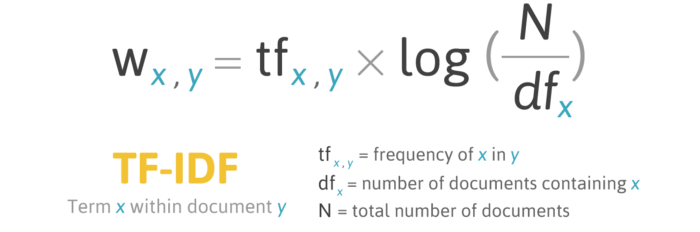


In [ ]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(train.data)

In [ ]:
# loss = Função de perda temos hinge, log_loss, log, modified_huber, squared_hinge, perceptron, squared_error, huber, epsilon_insensitive, squared_epsilon_insensitive
# penalty = Função de regularização, temos l2, l1, elasticnet
# alpha = Coeficiente de regularização. Constante que multiplica o prazo de regularização. Quanto maior o valor, mais forte a regularização. Também usado para calcular a taxa de aprendizado quando definido como learning_rate é definido como 'ótimo'. Os valores devem estar no intervalo
# tol = Critério de parada. Quanto menor o valor, mais precisão ao final.
# max_iter = Número máximo de iterações.

sgd_model = SGDClassifier(loss='huber', penalty='l2', alpha=1e-3, random_state=42, max_iter=100, tol=None)
sgd_model.fit(x_train_tfidf, train.target)

SGDClassifier(alpha=0.001, loss='huber', max_iter=100, random_state=42,
              tol=None)

In [ ]:
mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True)
mlp_model.fit(x_train_tfidf, train.target)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(70,), random_state=1,
              solver='lbfgs', verbose=True)

In [ ]:
test = fetch_20newsgroups(subset='test', categories=categorias, shuffle=True, random_state=42)

In [ ]:
docs_test = test.data # X textos sem a classe
vect_transform = vectorizer.transform(docs_test) # Transformação do Tf-IDF
sgd_predicted = sgd_model.predict(vect_transform) # predict do Modelo

print(metrics.classification_report(test.target, sgd_predicted,target_names=test.target_names))
print(sgd_model.classes_)

                 precision    recall  f1-score   support

      rec.autos       0.93      0.97      0.95       396
rec.motorcycles       0.97      0.93      0.95       398

       accuracy                           0.95       794
      macro avg       0.95      0.95      0.95       794
   weighted avg       0.95      0.95      0.95       794

[0 1]


[[385  11]
 [ 29 369]]


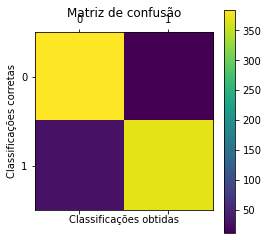

In [ ]:
confusion_matrix = confusion_matrix(test.target, sgd_predicted)
print(confusion_matrix)

plt.matshow(confusion_matrix)
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()

In [ ]:
### MLP 
vect_transform = vectorizer.transform(docs_test)
mlp_predicted = mlp_model.predict(vect_transform)


print(metrics.classification_report(test.target, mlp_predicted,target_names=test.target_names))
print(mlp_model.classes_)

                 precision    recall  f1-score   support

      rec.autos       0.96      0.98      0.97       396
rec.motorcycles       0.98      0.96      0.97       398

       accuracy                           0.97       794
      macro avg       0.97      0.97      0.97       794
   weighted avg       0.97      0.97      0.97       794

[0 1]


In [ ]:
# Salvando modelos com joblib 

# Salvando os modelos 
import joblib

joblib.dump(mlp_model, 'mlp_model.pkl')
joblib.dump(sgd_model, 'sgd_model.pkl')

['sgd_model.pkl']

In [ ]:
# Carregando modelos salvos

mlp_model = joblib.load('mlp_model.pkl')
sgd_model = joblib.load('sgd_model.pkl')

In [ ]:
# Teste no modelo 

docs_new = [
    'Wednesday morning, the legal team had appeared to turn back toward more discreet lawyering, with the announcement that Washington trial lawyer Emmet Flood would join the team inside the White House.',
    'By the time Rolls-Royce unveiled its one-of-a-kind Serenity Phantom at the 2015 Geneva Motor Show.'
]

X_new_tfidf_vectorize = vectorizer.transform(docs_new)

mlp_predicted = mlp_model.predict(X_new_tfidf_vectorize)

for doc, category in zip(docs_new, mlp_predicted):
    print('O texto a seguir..: {}, foi classificado como {}. '.format(doc, train.target_names[category]))

O texto a seguir..: Wednesday morning, the legal team had appeared to turn back toward more discreet lawyering, with the announcement that Washington trial lawyer Emmet Flood would join the team inside the White House., foi classificado como rec.motorcycles. 
O texto a seguir..: By the time Rolls-Royce unveiled its one-of-a-kind Serenity Phantom at the 2015 Geneva Motor Show., foi classificado como rec.autos. 


In [ ]:
docs_new = [
    'Wednesday morning, the legal team had appeared to turn back toward more discreet lawyering, with the announcement that Washington trial lawyer Emmet Flood would join the team inside the White House.',
    'By the time Rolls-Royce unveiled its one-of-a-kind Serenity Phantom at the 2015 Geneva Motor Show.'
]

X_new_tfidf_vectorize = vectorizer.transform(docs_new)

sgd_predicted = sgd_model.predict(X_new_tfidf_vectorize)

for doc, category in zip(docs_new, sgd_predicted):
    print('O texto a seguir..: {}, foi classificado como {}. '.format(doc, train.target_names[category]))

O texto a seguir..: Wednesday morning, the legal team had appeared to turn back toward more discreet lawyering, with the announcement that Washington trial lawyer Emmet Flood would join the team inside the White House., foi classificado como rec.motorcycles. 
O texto a seguir..: By the time Rolls-Royce unveiled its one-of-a-kind Serenity Phantom at the 2015 Geneva Motor Show., foi classificado como rec.autos. 
